In [1]:
import numpy as np  # NumPy for arrays
import torch  # PyTorch for tensors
import torch.nn as nn  # Neural network module
from torch.utils.data import DataLoader, TensorDataset  # Data loading utilities
import torch.optim as optim
import matplotlib.pyplot as plt  # For plotting
from matplotlib import cm  # Colormap for plots

# Data Generating Process

In [2]:
def dgp_y(x):
    torch.manual_seed(123) # fixing the seed

    y = 2*(1-torch.exp(-torch.abs(x+torch.sin(x**2))))
    return y

In [3]:
x_train = torch.arange(0,6,0.5).unsqueeze(dim=1)
y_train = dgp_y(x_train)
x_test = torch.arange(0,6,0.01).unsqueeze(dim=1)
y_test = dgp_y(x_test)

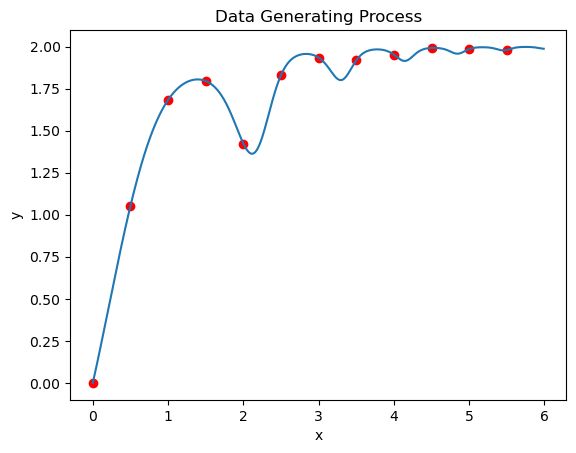

In [4]:
plt.scatter(x_train,y_train, color = "r")
plt.plot(x_test,y_test)
plt.title("Data Generating Process")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

# Neural Network Approximation

## Defining the neural network

In [5]:
class NN(nn.Module):
    def __init__(self,
                 dim_hidden = 128,):
        super().__init__()
        torch.manual_seed(123) # fixing the seed
        self.dim_hidden= dim_hidden
        
        self.y = nn.Sequential(
            nn.Linear(1, dim_hidden),
            nn.ReLU(),
            nn.Linear(dim_hidden, 1),
        )

    def forward(self, x):
        return self.y(x)

In [6]:
def count_parameters(model):
    """
    Counts the number of trainable weights and biases in the neural network.

    Parameters:
    - model: The PyTorch model

    Returns:
    - total_params: The total number of parameters (weights + biases)
    """
    total_params = 0
    for param in model.parameters():
        total_params += param.numel()  # numel() returns the total number of elements (weights/biases) in the parameter
    return total_params

In [7]:
def train_lbfgs(model, epochs=100, lr=0.1):
    """
    Trains the input model using LBFGS optimizer.

    Parameters:
    - model: PyTorch model to be trained
    - x_train: Training data (input)
    - y_train: Training data (target output)
    - epochs: Number of training epochs (default is 100)
    - lr: Learning rate for the LBFGS optimizer (default is 0.1)

    Returns:
    - model: The trained model
    - loss_history: A list of loss values recorded during training
    """
    
    # Define the loss function (Mean Squared Error)
    criterion = nn.MSELoss()
    
    # Define the LBFGS optimizer
    optimizer = optim.LBFGS(model.parameters(), lr=lr)
    
    # Closure function required by LBFGS
    def closure():
        optimizer.zero_grad()  # Zero out gradients
        output = model(x_train)  # Forward pass
        loss = criterion(output, y_train)  # Compute loss
        loss.backward()  # Backpropagate to calculate gradients
        return loss

    # List to store loss values for each epoch
    loss_history = []

    # Training loop
    for epoch in range(epochs):
        optimizer.step(closure)  # Perform LBFGS step

        # Record loss every epoch
        with torch.no_grad():
            output = model(x_train)
            loss = criterion(output, y_train)
            loss_history.append(loss.item())
            if epoch % 10 == 0:  # Print loss every 10 epochs
                print(f'Epoch {epoch}: Loss = {loss.item()}')

    return model, loss_history

## Generating the list for train and test loss

In [8]:
uniform_mesh = torch.linspace(0, 1, steps=100)
mesh_dim_hidden = (uniform_mesh**3) * 5000+1
mesh_dim_hidden = torch.unique(mesh_dim_hidden.round().int())
len(mesh_dim_hidden)
train_loss_vec = torch.zeros(len(mesh_dim_hidden))
test_loss_vec = torch.zeros(len(mesh_dim_hidden))

In [9]:
"""
for i,dim in enumerate(mesh_dim_hidden):
    print(i)
    model = NN(dim_hidden = dim)
    trained_model, loss_history =  train_lbfgs(model , epochs=100, lr=0.1)
    train_loss_vec[i] = loss_history[-1]
    err_test = (model(x_test).detach()-y_test)**2
    test_loss_vec[i] = err_test.mean()
"""   

'\nfor i,dim in enumerate(mesh_dim_hidden):\n    print(i)\n    model = NN(dim_hidden = dim)\n    trained_model, loss_history =  train_lbfgs(model , epochs=100, lr=0.1)\n    train_loss_vec[i] = loss_history[-1]\n    err_test = (model(x_test).detach()-y_test)**2\n    test_loss_vec[i] = err_test.mean()\n'

In [10]:
fontsize= 18
ticksize = 14
figsize = (15, 10)
params = {'font.family':'serif',
    "figure.figsize":figsize,
    'figure.dpi': 80,
    'figure.edgecolor': 'k',
    'font.size': fontsize,
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'xtick.labelsize': ticksize,
    'ytick.labelsize': ticksize
}
plt.rcParams.update(params)

In [11]:
model_1 = NN(dim_hidden = 10)
print(count_parameters(model_1))

# Train the model using LBFGS
trained_model_1, loss_history_1 = train_lbfgs(model_1 , epochs=100, lr=0.1)

y_hat_1 = trained_model_1(x_test).detach()


31
Epoch 0: Loss = 0.2866058647632599
Epoch 10: Loss = 0.011162147857248783
Epoch 20: Loss = 0.011162147857248783
Epoch 30: Loss = 0.011162147857248783
Epoch 40: Loss = 0.011162147857248783
Epoch 50: Loss = 0.011162147857248783
Epoch 60: Loss = 0.011162147857248783
Epoch 70: Loss = 0.011162147857248783
Epoch 80: Loss = 0.011162147857248783
Epoch 90: Loss = 0.011162147857248783


In [12]:
model_2 = NN(dim_hidden = 800)
print(count_parameters(model_2))

# Train the model using LBFGS
trained_model_2, loss_history_2 = train_lbfgs(model_2 , epochs=100, lr=0.1)

y_hat_2 = trained_model_2(x_test).detach()


2401
Epoch 0: Loss = 0.29526039958000183
Epoch 10: Loss = 0.00012595653242897242
Epoch 20: Loss = 0.001127092749811709
Epoch 30: Loss = 4.4621378037845716e-05
Epoch 40: Loss = 4.4569242163561285e-05
Epoch 50: Loss = 4.523578172666021e-05
Epoch 60: Loss = 4.4872198486700654e-05
Epoch 70: Loss = 4.4456621253630146e-05
Epoch 80: Loss = 4.502884985413402e-05
Epoch 90: Loss = 4.48497012257576e-05


In [13]:
model_3 = NN(dim_hidden = 4000)
print(count_parameters(model_3))

# Train the model using LBFGS
trained_model_3, loss_history_3 = train_lbfgs(model_3 , epochs=100, lr=0.1)

y_hat_3 = trained_model_3(x_test).detach()

12001
Epoch 0: Loss = 0.3169228136539459
Epoch 10: Loss = 0.001923350035212934
Epoch 20: Loss = 3.476898928056471e-05
Epoch 30: Loss = 6.185622964949289e-07
Epoch 40: Loss = 6.155600544843765e-07
Epoch 50: Loss = 6.154109541967046e-07
Epoch 60: Loss = 6.154109541967046e-07
Epoch 70: Loss = 6.154109541967046e-07
Epoch 80: Loss = 6.154109541967046e-07
Epoch 90: Loss = 6.154109541967046e-07


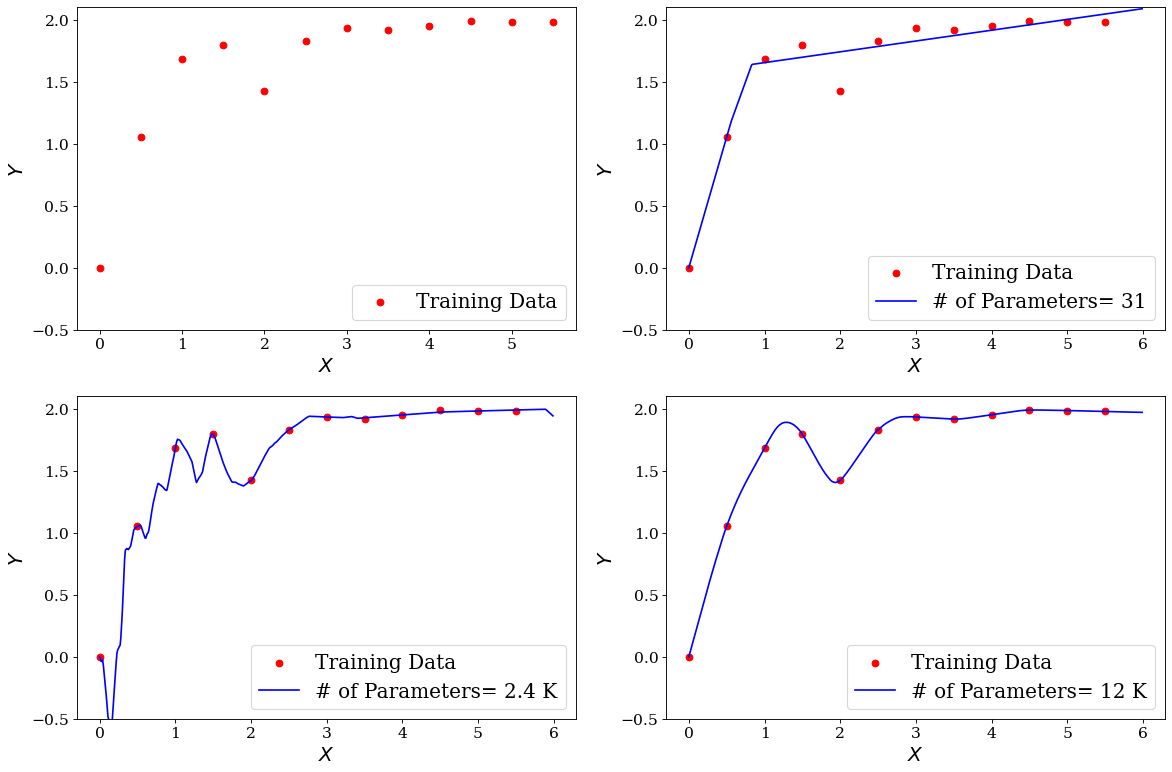

In [14]:
plt.subplot(2, 2 , 1)
plt.scatter(x_train,y_train, color = "r", label = "Training Data")
plt.xlabel(r"$X$")
plt.ylabel(r"$Y$")
plt.ylim(-0.5, 2.1)  
plt.legend(loc='lower right')

plt.subplot(2, 2 , 2)
plt.scatter(x_train,y_train, color = "r", label = "Training Data")
plt.plot(x_test, y_hat_1, color = "b", label = r"# of Parameters= 31")
plt.xlabel(r"$X$")
plt.ylabel(r"$Y$")
plt.ylim(-0.5, 2.1) 
plt.legend(loc='best')

plt.subplot(2, 2, 3)
plt.scatter(x_train,y_train, color = "r", label = "Training Data")
plt.plot(x_test, y_hat_2, color = "b",  label = "# of Parameters= 2.4 K")
plt.xlabel(r"$X$")
plt.ylabel(r"$Y$")
plt.ylim(-0.5, 2.1)  
plt.legend(loc='best')

plt.subplot(2, 2, 4)
plt.scatter(x_train,y_train, color = "r", label = "Training Data")
plt.plot(x_test, y_hat_3, color = "b", label = "# of Parameters= 12 K")
plt.xlabel(r"$X$")
plt.ylabel(r"$Y$")
plt.ylim(-0.5, 2.1) 
plt.legend(loc='best')
plt.tight_layout()

plt.savefig('smooth_interpolation.pdf')
